# Time Series Analysis of the monthly exchange rates


### 1. Importing Python libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, timezone
import calendar

import matplotlib.pyplot as plt
import statsmodels as sm

#setting plot style
plt.style.use('seaborn')

#setting plot size
plt.rcParams['figure.figsize'] = [14,8]

### 2. Reading input file


In [2]:
%%time
file = '../Data/EXUSNZ.csv'

rate=pd.read_csv(file, skiprows=1, header=None,
                  names=['Date','EXUSNZ'],
                  parse_dates=['Date'],
                  index_col='Date')
rate.head(5)

Wall time: 4.61 ms


,EXUSNZ
Date,
1971-01-01,1.1194
1971-02-01,1.1250
1971-03-01,1.1254
1971-04-01,1.1250
1971-05-01,1.1254


In [3]:
rate.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 615 entries, 1971-01-01 to 2022-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EXUSNZ  615 non-null    float64
dtypes: float64(1)
memory usage: 9.6 KB


<AxesSubplot:xlabel='Date'>

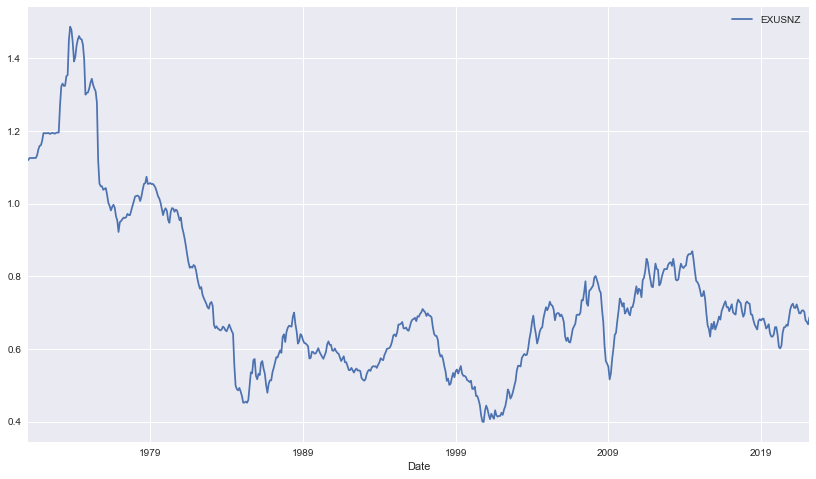

In [4]:
rate.plot()

### 3. Calculating autocorrelation

In [5]:
monthly_diff = rate.diff()
monthly_diff.head(5)

,EXUSNZ
Date,
1971-01-01,NaN
1971-02-01,0.0056
1971-03-01,0.0004
1971-04-01,-0.0004
1971-05-01,0.0004


In [6]:
autocorrelation_monthly = monthly_diff['EXUSNZ'].autocorr()
print(autocorrelation_monthly)

0.3569601722245796


0.09218693991820154


<AxesSubplot:xlabel='Date'>

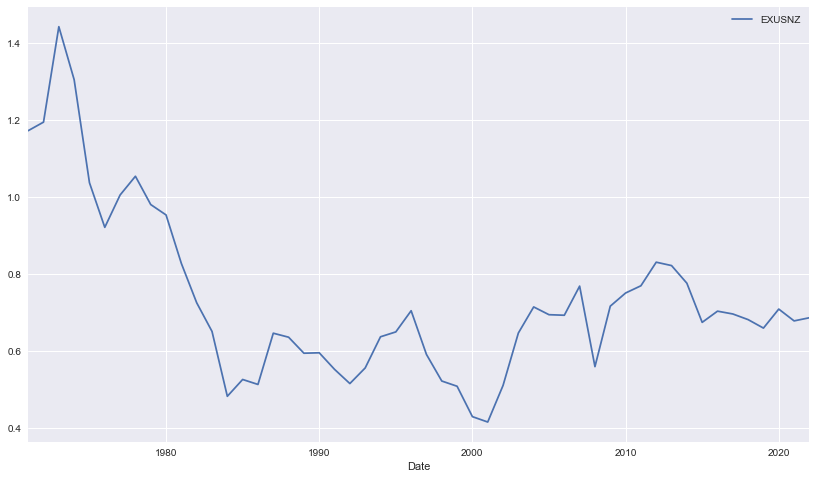

In [7]:
#downsample from monthly to anualy

yearly_rate = rate.resample(rule='A').last()
yearly_diff = yearly_rate.diff()
autocorrelation_yearly = yearly_diff['EXUSNZ'].autocorr()
print(autocorrelation_yearly)
yearly_rate.plot()